2. Decision Tree

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

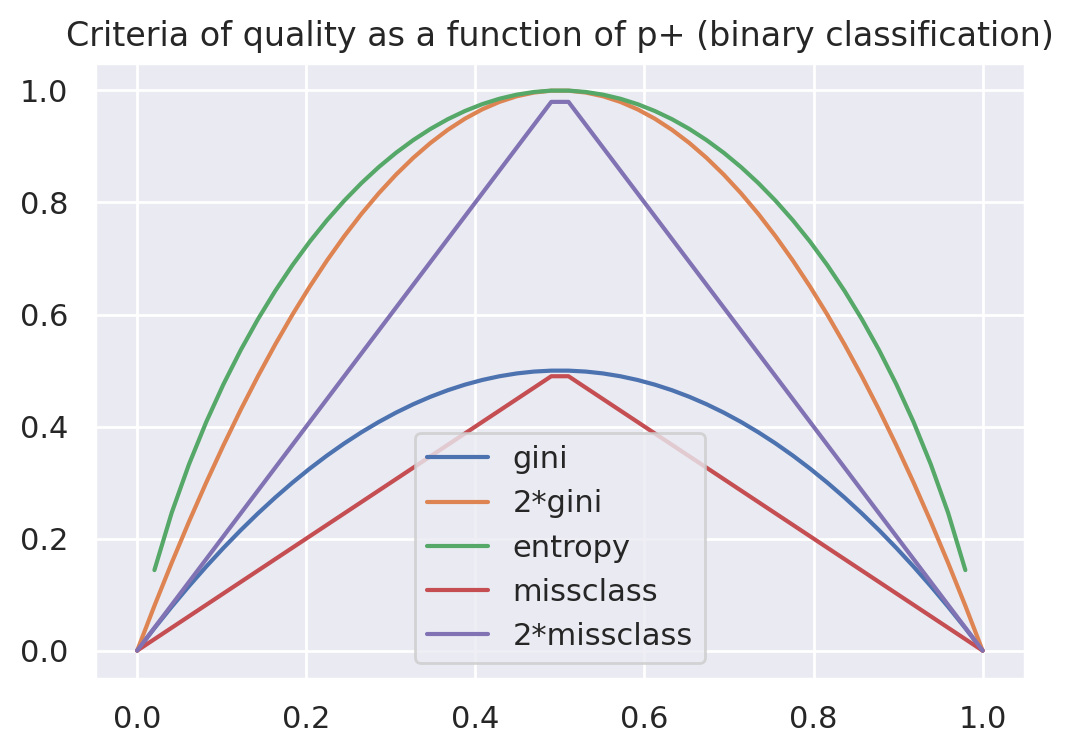

In [ ]:
plt.figure(figsize=(6, 4))
xx= np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel=('p+')
plt.ylabel=('criterion')
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend();


In [ ]:
np.random.seed(17)
train_data= np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]


In [ ]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
train_data[:, 0]

array([ 2.76265890e-01,  6.23901111e-01,  1.03719047e+00, -1.11698290e-01,
        1.48675045e-01,  2.17125700e+00, -1.81881234e+00,  5.39839614e-01,
        1.31487654e+00, -1.09222990e+00, -9.82294304e-01,  4.91333776e-01,
       -8.06360082e-01, -1.21256024e+00, -7.55223036e-01,  9.77541764e-01,
        1.03856305e-01,  9.68205296e-01,  5.67783089e-01, -1.16537308e+00,
       -1.15541329e+00,  1.26727211e-01,  5.57674431e-01,  6.37926174e-01,
       -9.16093154e-01,  1.11918180e+00,  2.44520021e-01,  4.29563902e-01,
       -6.10070049e-01, -7.10834005e-01, -2.30372978e-01, -7.88469835e-01,
       -7.95581116e-01,  5.22537282e-01,  2.72079559e+00, -8.35943995e-01,
        3.93094680e-01,  7.75201683e-01, -5.40979900e-01,  1.20838513e+00,
       -4.26631209e-01,  5.72797618e-02,  9.34148086e-01,  2.20701631e+00,
        1.23352890e+00, -9.76936921e-01,  2.87112692e+00,  1.00360318e+00,
        5.60039692e-01, -2.24798719e-01, -1.54258363e-01,  5.79361031e-01,
        1.66961828e+00, -

In [ ]:
train_data[:, 1]

array([-1.85462808e+00,  1.14531129e+00,  1.88663893e+00, -3.62101338e-01,
       -4.37783153e-01,  1.15231025e+00, -1.38049341e-01, -1.77528229e+00,
       -4.73448047e-01, -2.50027442e-01,  1.03126909e+00, -4.46646604e-01,
        1.31267758e-01,  1.59990853e-01,  3.49895992e-01, -1.38585250e-01,
        3.00591036e-01,  8.69623842e-01,  4.65282344e-01, -2.03599479e+00,
        3.34515739e+00, -6.94178896e-01,  9.91466000e-02,  7.03110681e-01,
       -7.86014228e-01, -9.83396109e-01, -5.81409738e-01,  7.98401988e-01,
        1.18540421e+00, -7.81128931e-01,  1.20195083e-01, -2.96012262e+00,
        2.84582250e-01,  8.35544439e-02,  6.11007883e-01, -3.69604083e-03,
        6.84495084e-01,  5.56002886e-01,  1.52441725e+00,  5.12772844e-02,
        8.07940228e-01, -1.04017157e+00, -1.20034542e-01, -3.39993078e+00,
       -5.87880839e-01,  4.68070300e-01, -1.20808568e+00,  1.13072645e+00,
       -6.18397301e-01,  2.21590145e+00,  2.87607236e-01,  9.33250238e-01,
        1.71723950e+00, -

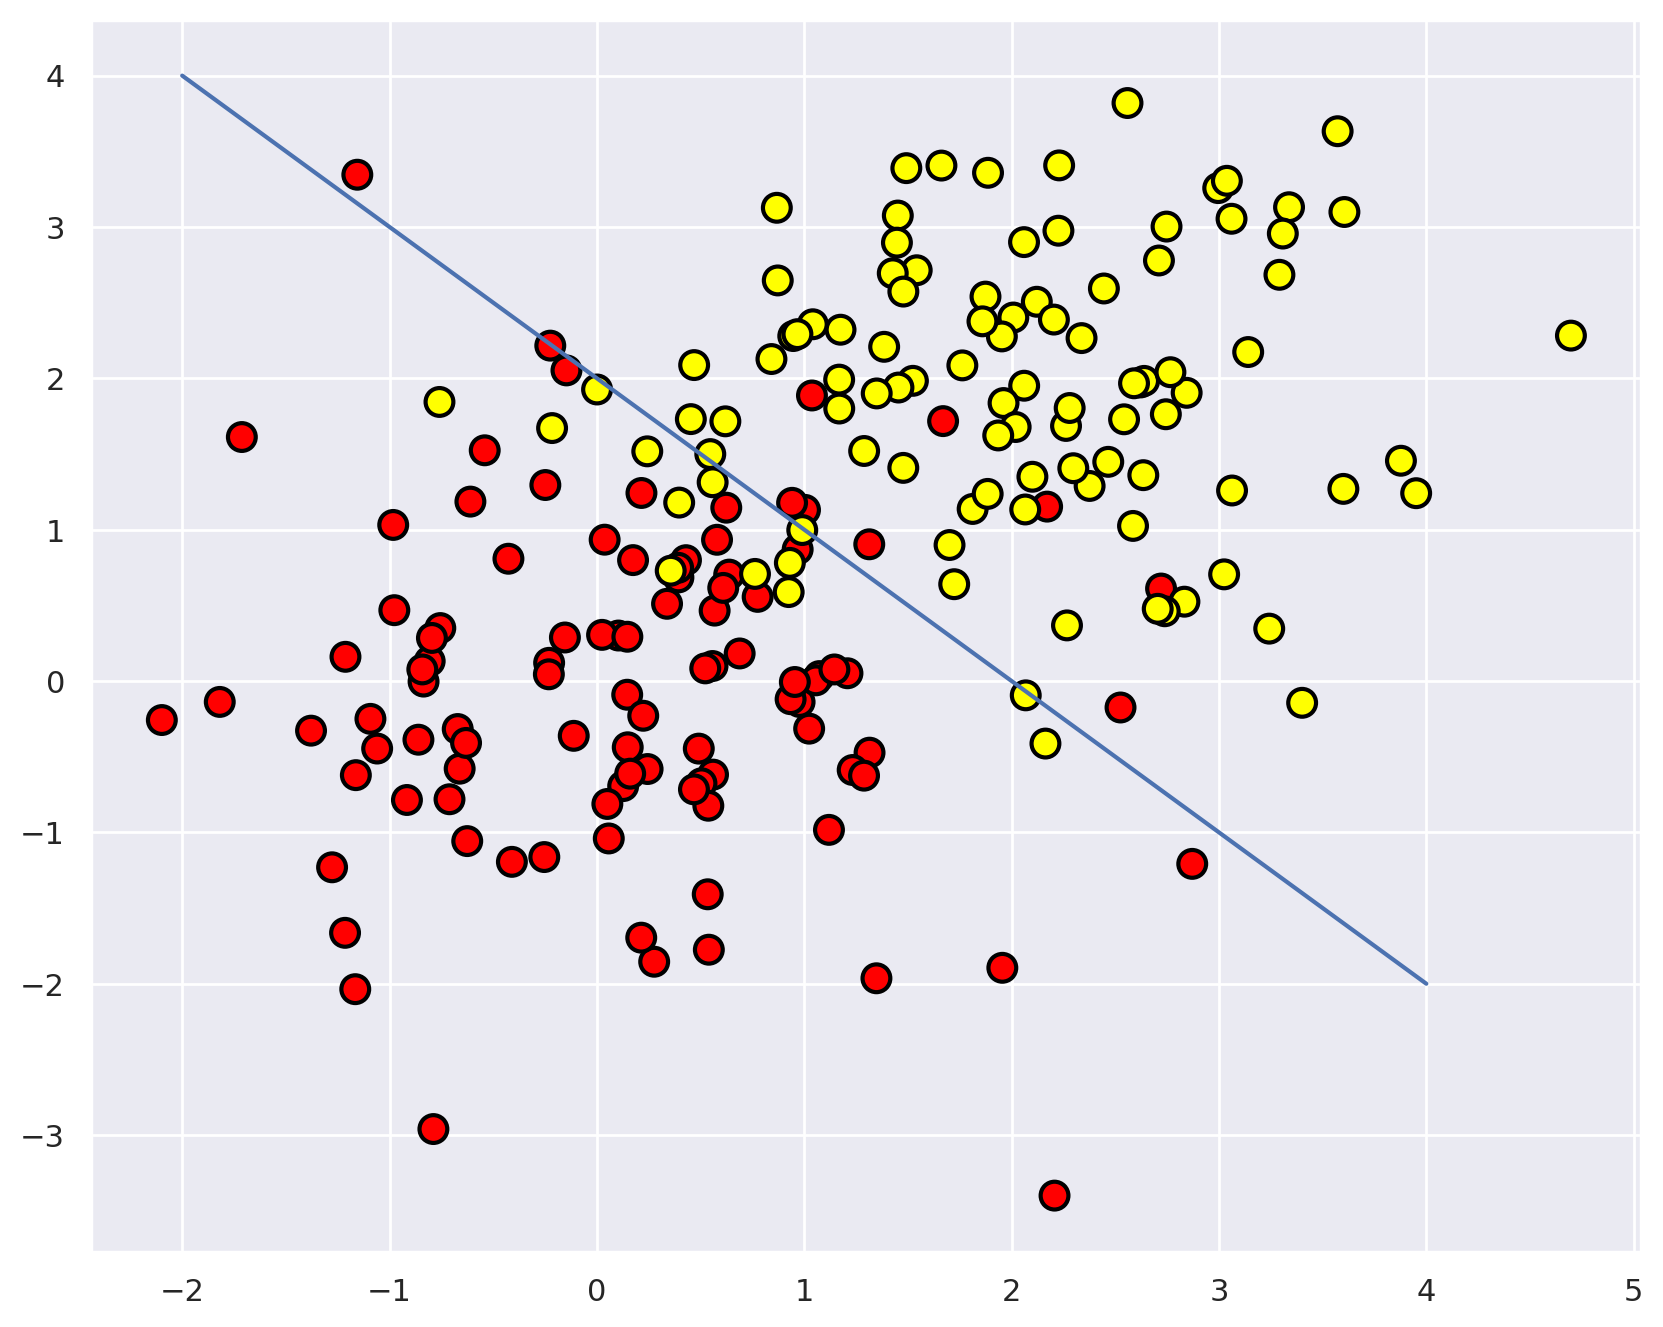

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

In [ ]:
from sklearn.tree import DecisionTreeClassifier

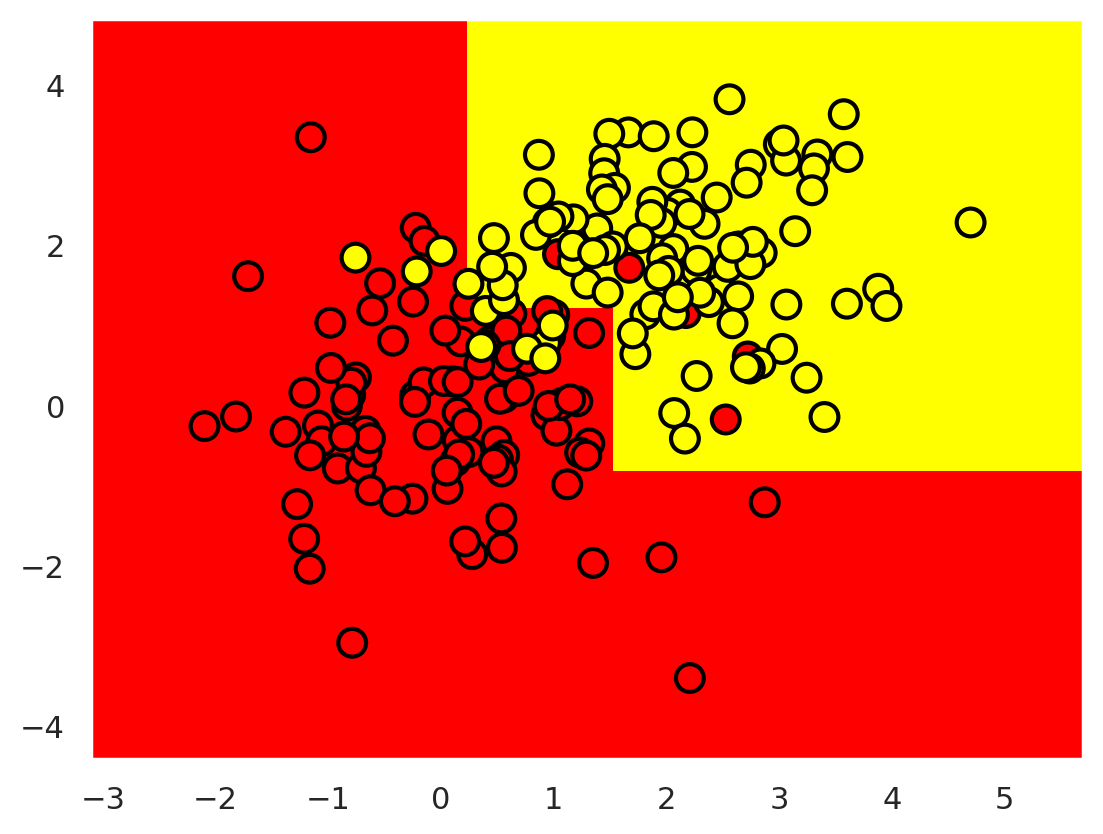

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap = 'autumn')
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    # needs graphviz to be installed
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [ ]:
tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"],
    png_file_to_save="topic3_decision_tree1.png",
)

In [ ]:
tree_graph_to_png(tree=clf_tree, feature_names = ['x1', 'x2'], png_file_to_save ='topic3_desicion_tree.png')

In [ ]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [ ]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1,1), data['Loan Default'].values)
tree_graph_to_png(age_tree, feature_names = ['Age'], png_file_to_save ='topic3_decision.png')

<function __main__.tree_graph_to_png(tree, feature_names, png_file_to_save)>

In [ ]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [ ]:
data2.sort_values("Salary")


,Age,Salary,Loan Default
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [ ]:
age_sal_tree = DecisionTreeClassifier(random_state =17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values)

DecisionTreeClassifier(random_state=17)

In [ ]:
tree_graph_to_png(
    tree=age_sal_tree,
    feature_names=["Age", "Salary"],
    png_file_to_save="topic3_decision_tree3.png",
)

In [ ]:
n_train = 150
n_test = 1000
noise = 0.1

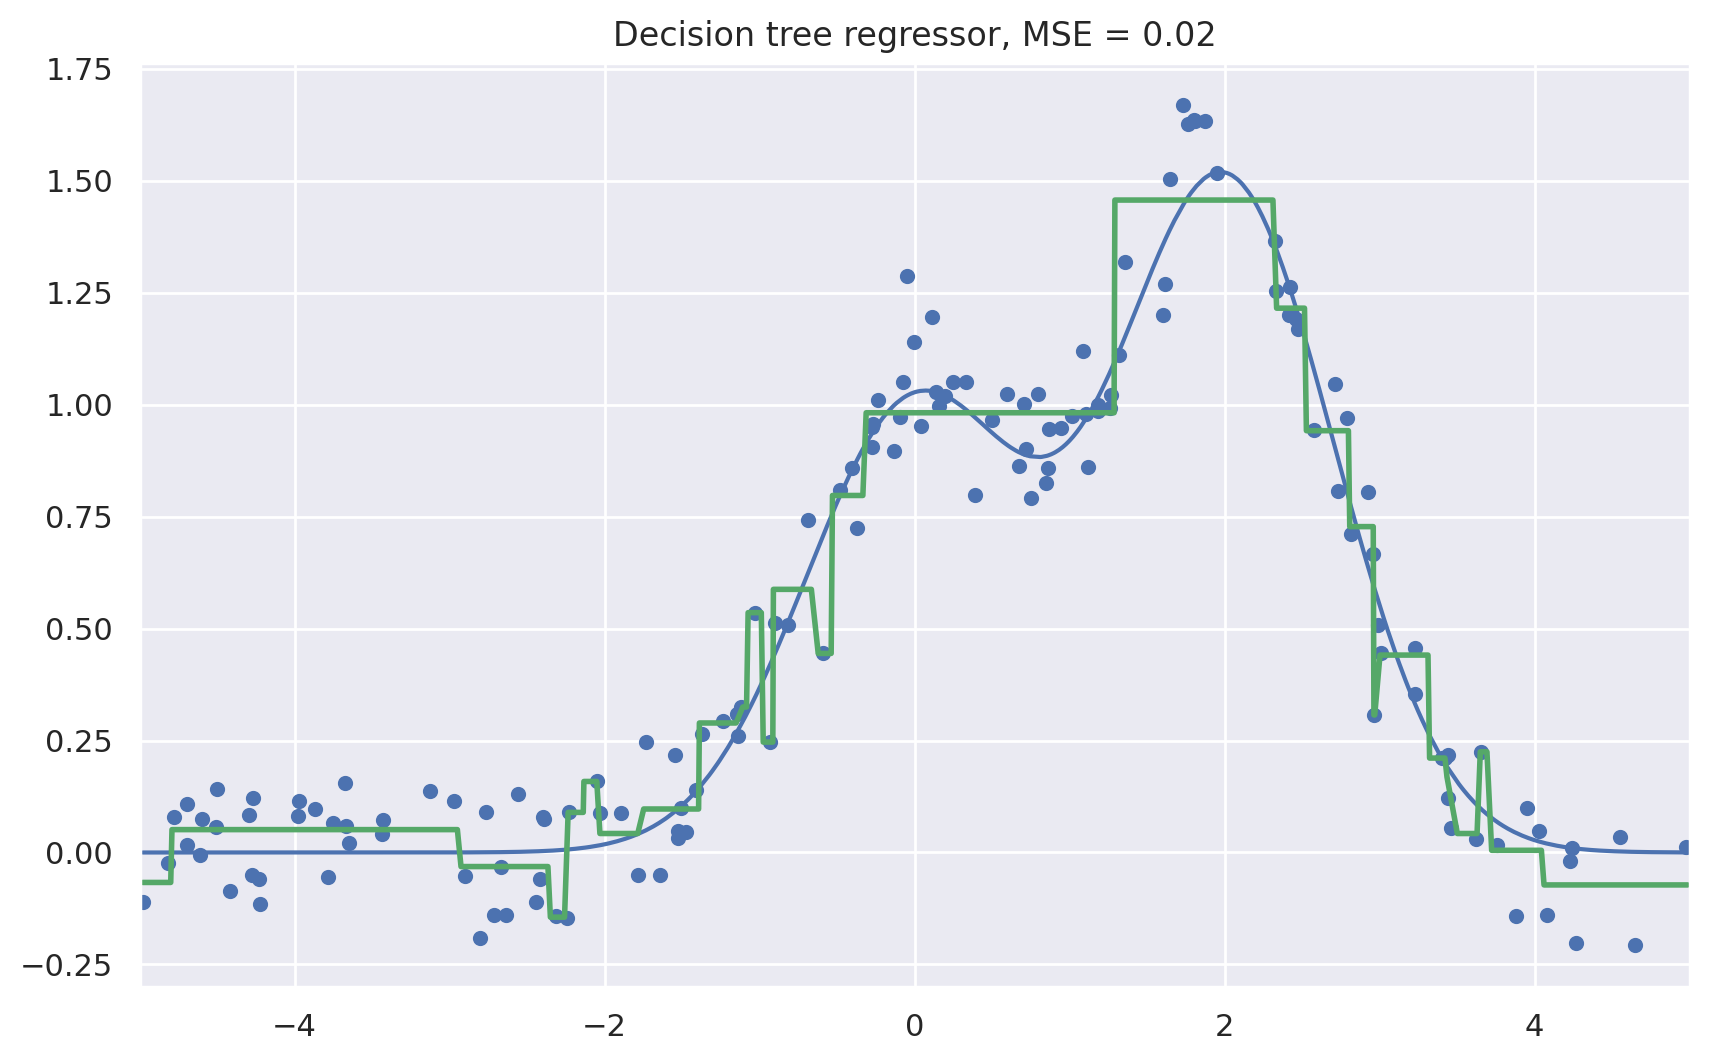

In [ ]:
def f(x):
  x = x.ravel()
  return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))
def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()


3. Nearest Neighbors Method

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"


In [ ]:
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

In [ ]:
df["International plan"] = pd.factorize(df["International plan"])[0]


In [ ]:
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]


In [ ]:
df['Churn']=df['Churn'].astype('int')

In [ ]:
states = df['State']

In [ ]:
y = df['Churn']

In [ ]:
df.drop(['State', 'Churn'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state =17)


In [ ]:
tree = DecisionTreeClassifier(max_depth = 5, random_state =17)
knn = KNeighborsClassifier(n_neighbors=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.94

In [ ]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_holdout, knn_pred)

0.89

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': range(1, 11), 'max_features':range(4, 19)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=1, verbose=True)
tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [ ]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [ ]:
tree_grid.best_score_

0.94257014456259

In [ ]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))  # 0.946


0.946

In [ ]:
tree_graph_to_png(
    tree=tree_grid.best_estimator_,
    feature_names=df.columns,
    png_file_to_save="topic3_decision_tree4.png",
)

In [ ]:
from sklearn.pipeline import Pipeline
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)
knn_params = {"knn__n_neighbors": range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


({'knn__n_neighbors': 7}, 0.8859867109023905)

In [ ]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
forest = RandomForestClassifier(n_estimators= 100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))  # 0.949


0.9494233119813256


In [ ]:
forest_params = {"max_depth": range(6, 12), "max_features": range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


({'max_depth': 9, 'max_features': 6}, 0.9511372931045574)

In [ ]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout))

0.953

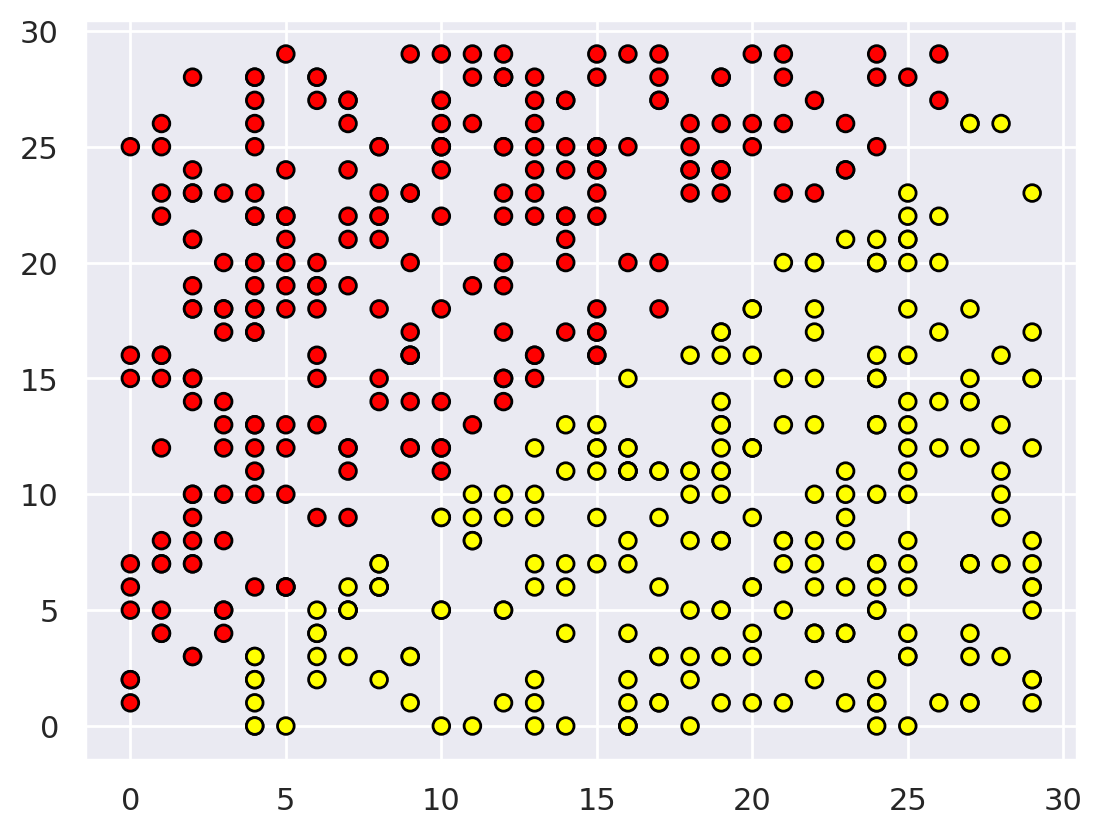

In [ ]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)


X, y = form_linearly_separable_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')

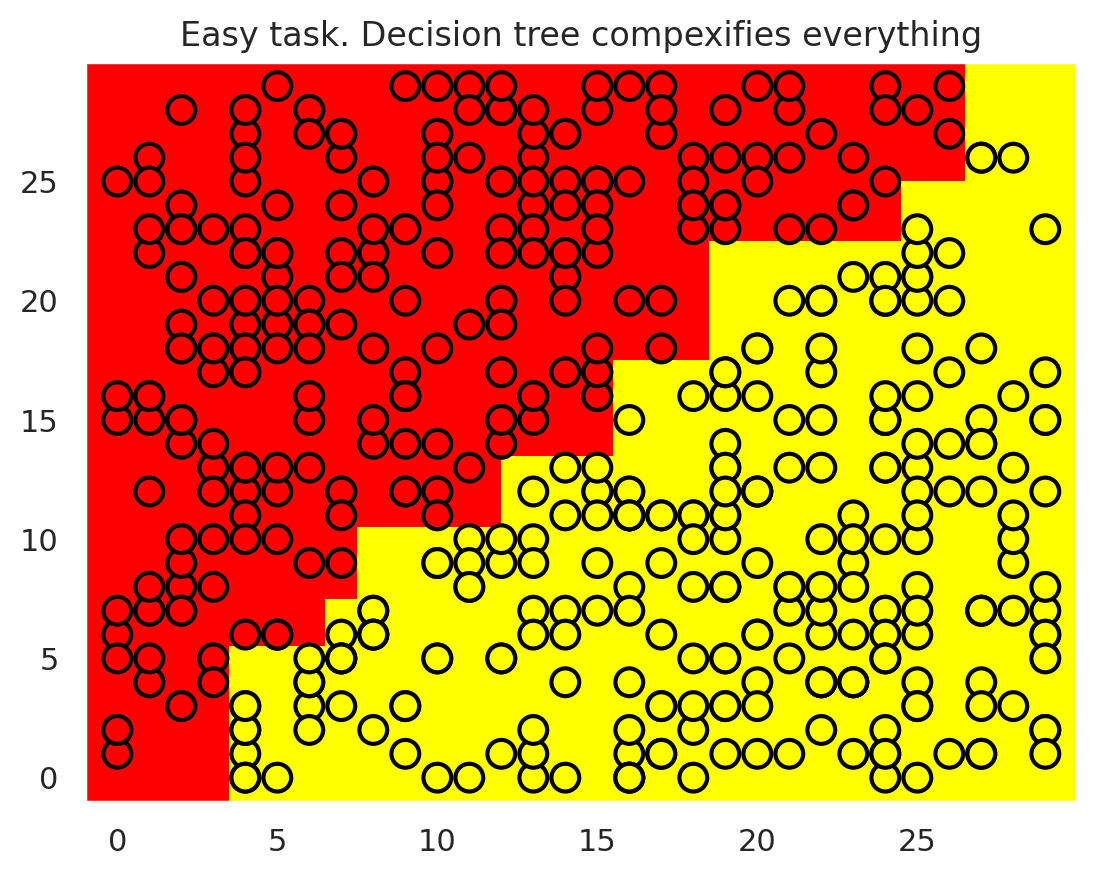

In [ ]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task. Decision tree compexifies everything");

In [ ]:
tree_graph_to_png(
    tree=tree,
    feature_names=["x1", "x2"],
    png_file_to_save="topic3_decision_tree5.png",
)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X, y)

In [ ]:
xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task, kNN. Not bad");

KeyboardInterrupt: ignored

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

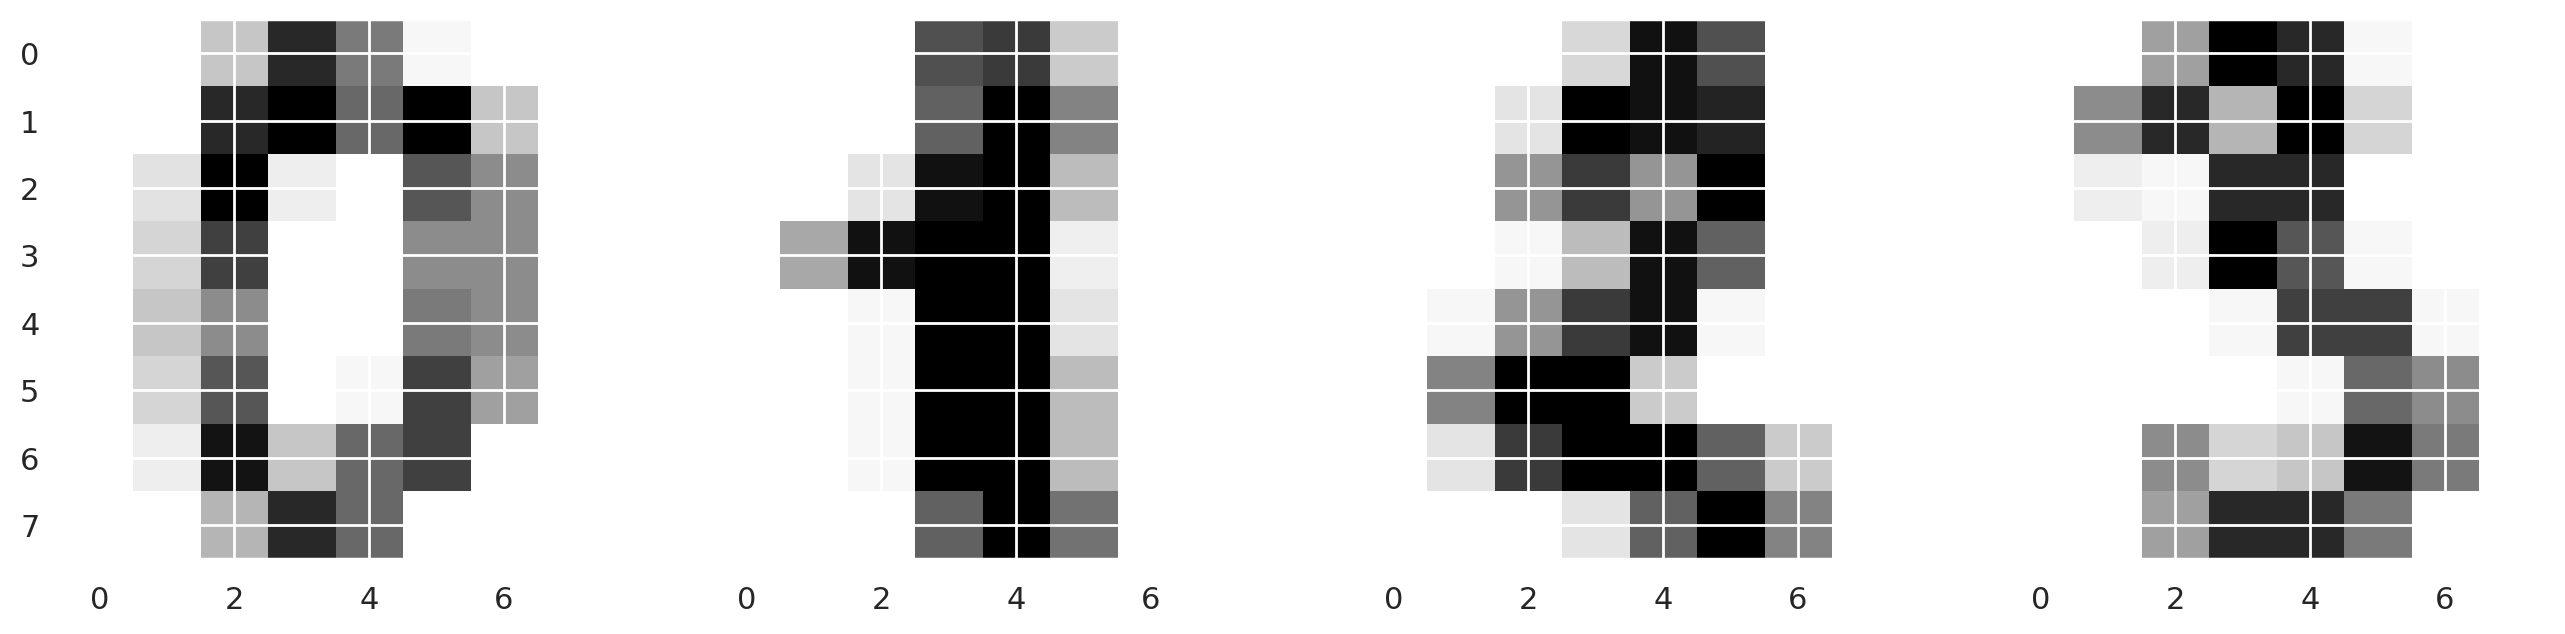

In [ ]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
)

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [ ]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(
    y_holdout, tree_pred
)  # (0.976, 0.666)

(0.975925925925926, 0.6666666666666666)

In [ ]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [ ]:
tree_grid.best_params_, tree_grid.best_score_  # ({'max_depth': 20, 'max_features': 64}, 0.844)


({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [ ]:
np.mean(
    cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)
)  # 0.987

0.9864858028204642

In [ ]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5 ))

0.9753462341111744

Complex Case for the Nearest Neighbors Method

In [ ]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y


X, y = form_noisy_data()

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state = 17)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))
n_neighb

[1, 2, 3, 5, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

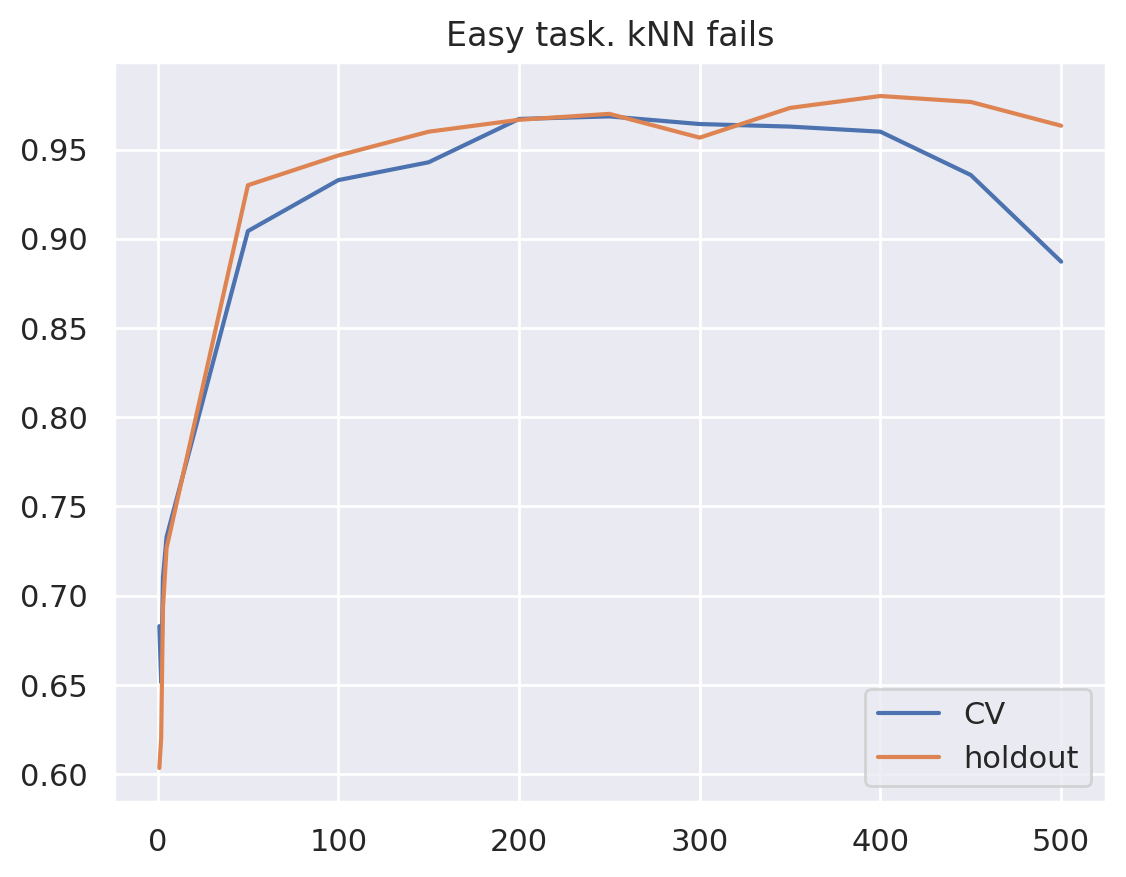

In [ ]:
for k in n_neighb:

    knn_pipe = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label="CV")
plt.plot(n_neighb, holdout_scores, label="holdout")
plt.title("Easy task. kNN fails")
plt.legend();

In [ ]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print("Decision tree. CV: {}, holdout: {}".format(tree_cv_score, tree_holdout_score))


Decision tree. CV: 1.0, holdout: 1.0


In [89]:
import collections

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [90]:
def create_df(dic, feature_list):
  out = pd.DataFrame(dic)
  out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
  out.drop(feature_list,axis=1, inplace = True)
  return out
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]


Подготовка тренировочных данных

In [91]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])
df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [92]:
df_test = {}
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [93]:
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Looks_repulsive,Money_spent_little,Eloquence_high,Looks_handsome,Eloquence_average,Money_spent_lots,Alcoholic_beverage_no,Alcoholic_beverage_yes
0,0,0,1,1,0,1,0,1
1,0,1,0,1,0,0,0,1
2,0,0,0,1,1,1,1,0
3,1,1,0,0,1,0,1,0
4,1,0,0,0,0,1,0,1
5,1,0,1,0,0,1,0,1
6,0,0,0,1,1,1,0,1


Решение практических задач

In [94]:
np_array = y.values


In [95]:
uniques=y.unique()

In [96]:
entropy=0
for i in enumerate(uniques):
  entropy += -(len(np_array[np_array == i[1]])/len(np_array))*np.log2(len(np_array[np_array == i[1]])/len(np_array))
entropy

0.9852281360342515

In [97]:
dt = DecisionTreeClassifier(criterion="entropy", random_state=17)
dt.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy', random_state=17)

[Text(0.4, 0.875, "Money_spent_lots <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = Won't go"),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Will go'),
 Text(0.6, 0.625, "Looks_handsome <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Won't go"),
 Text(0.4, 0.375, "Eloquence_high <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Won't go"),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Will go'),
 Text(0.6, 0.125, "entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Won't go"),
 Text(0.8, 0.375, "entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Won't go")]

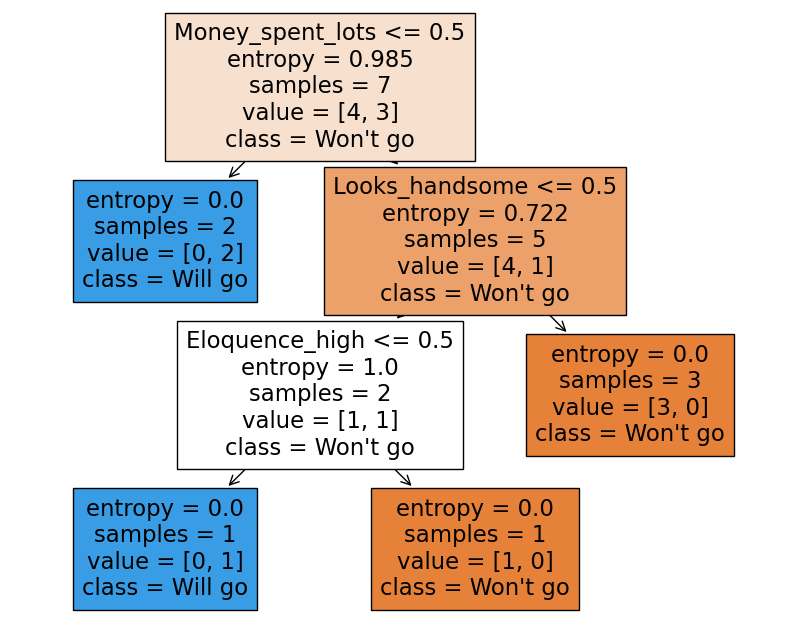

In [100]:
plot_tree(
    dt, feature_names=df_train.columns, filled=True, class_names=["Won't go", "Will go"]
)

In [101]:
balls = [1 for i in range(9)] + [0 for i in range(11)]

In [107]:
# two groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow

In [133]:
def entropy(a_list):
  entropys=0
  for i in enumerate(set(a_list)):
    entropys += -(len(np.array(a_list)[np.array(a_list) == i[1]])/len(np.array(a_list))*np.log2(len(np.array(a_list)[np.array(a_list) == i[1]])/len(np.array(a_list))))
  return entropys

In [134]:
print(entropy(balls))  # 9 blue и 11 yellow
print(entropy(balls_left))  # 8 blue и 5 yellow
print(entropy(balls_right))  # 1 blue и 6 yellow
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die


0.9927744539878083
0.9612366047228759
0.5916727785823275
2.584962500721156


In [135]:
def info_gain(root, right, left):
  return (entropy(root)- 1.0 * len(left) / len(root) * entropy(left)- 1.0 * len(right) / len(root) * entropy(right))

In [137]:
print(info_gain(balls, balls_left, balls_right))


0.16088518841412436


In [150]:
def information_gains(X, y):
  out =[]
  for i in X.columns:
    out.append(info_gain(y, y[X[i] == 0], y[X[i] == 1]))
  return out

In [151]:
information_gains(df_train, y)


[0.12808527889139443,
 0.46956521111470695,
 0.2916919971380597,
 0.12808527889139443,
 0.020244207153756077,
 0.46956521111470695,
 0.0059777114237740125,
 0.0059777114237740125]

In [152]:
def btree(X, y, feature_names):
    clf = information_gains(X, y)
    best_feat_id = clf.index(max(clf))
    best_feature = feature_names[best_feat_id]
    print(f"Best feature to split: {best_feature}")

    x_left = X[X.iloc[:, best_feat_id] == 0]
    x_right = X[X.iloc[:, best_feat_id] == 1]
    print(f"Samples: {len(x_left)} (left) and {len(x_right)} (right)")

    y_left = y[X.iloc[:, best_feat_id] == 0]
    y_right = y[X.iloc[:, best_feat_id] == 1]
    entropy_left = entropy(y_left)
    entropy_right = entropy(y_right)
    print(f"Entropy: {entropy_left} (left) and {entropy_right} (right)")
    print("_" * 30 + "\n")
    if entropy_left != 0:
        print(f"Splitting the left group with {len(x_left)} samples:")
        btree(x_left, y_left, feature_names)
    if entropy_right != 0:
        print(f"Splitting the right group with {len(x_right)} samples:")
        btree(x_right, y_right, feature_names)

In [153]:
btree(df_train, y, df_train.columns)


Best feature to split: Money_spent_little
Samples: 5 (left) and 2 (right)
Entropy: 0.7219280948873623 (left) and 0.0 (right)
______________________________

Splitting the left group with 5 samples:
Best feature to split: Looks_repulsive
Samples: 3 (left) and 2 (right)
Entropy: 0.0 (left) and 1.0 (right)
______________________________

Splitting the right group with 2 samples:
Best feature to split: Eloquence_high
Samples: 1 (left) and 1 (right)
Entropy: 0.0 (left) and 0.0 (right)
______________________________



PART TWO

In [359]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")


In [360]:
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [361]:
data_test = pd.read_csv(DATA_PATH + "adult_test.csv", sep=";")


In [362]:
data_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [363]:
data_test = data_test[(data_test["Target"] == " >50K.") | (data_test["Target"] == " <=50K.")]


In [364]:
data_test

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [365]:
data_train['Target']=data_train['Target'].apply(lambda x: 1 if x==' >50K' else 0)

In [366]:
data_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [367]:
data_test['Target']=data_test['Target'].apply(lambda x: 1 if x==' >50K.' else 0)

<ipython-input-367-b84c7eac32c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Target']=data_test['Target'].apply(lambda x: 1 if x==' >50K.' else 0)


In [368]:
data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [369]:
data_train

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


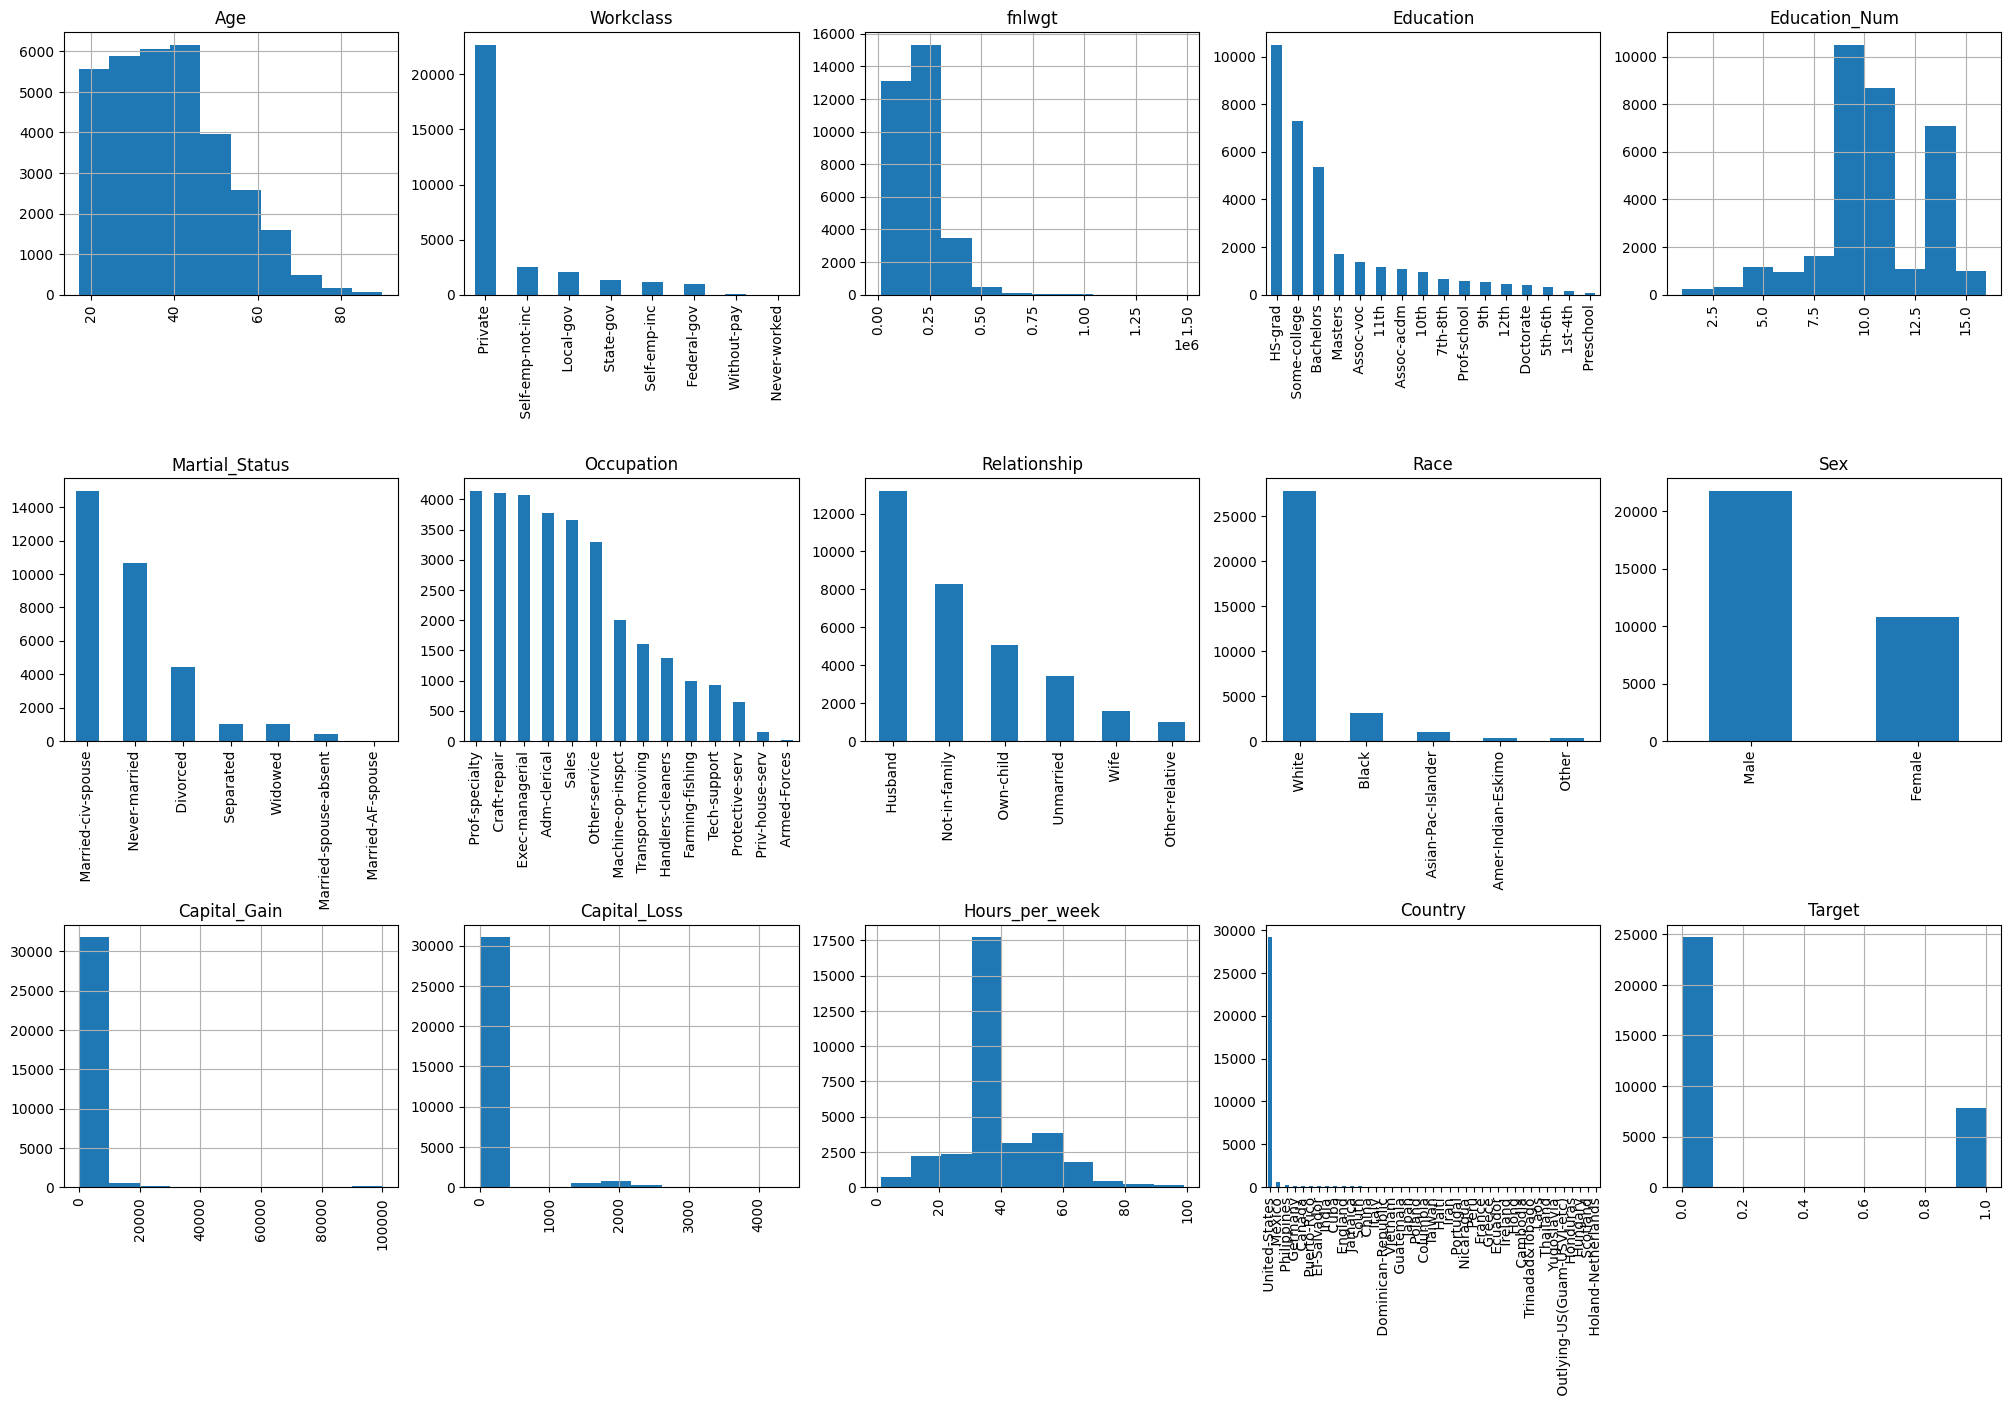

In [370]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(data_train.shape[1] / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

In [371]:
data_train.dtypes


Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [372]:
data_test.dtypes


Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target              int64
dtype: object

In [373]:
data_test['Age']= data_test['Age'].astype(int)

<ipython-input-373-53ed5671fef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Age']= data_test['Age'].astype(int)


In [374]:
data_test["fnlwgt"] = data_test["fnlwgt"].astype(int)
data_test["Education_Num"] = data_test["Education_Num"].astype(int)
data_test["Capital_Gain"] = data_test["Capital_Gain"].astype(int)
data_test["Capital_Loss"] = data_test["Capital_Loss"].astype(int)
data_test["Hours_per_week"] = data_test["Hours_per_week"].astype(int)

<ipython-input-374-2db1673dd84b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["fnlwgt"] = data_test["fnlwgt"].astype(int)
<ipython-input-374-2db1673dd84b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Education_Num"] = data_test["Education_Num"].astype(int)
<ipython-input-374-2db1673dd84b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [375]:
y_train = data_train.pop('Target')
y_test = data_test.pop('Target')

In [376]:
categorical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [377]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [378]:
for c in categorical_columns:
  data_train[c].fillna(data_train[c].mode()[0], inplace=True)
  data_test[c].fillna(data_train[c].mode()[0], inplace=True)
for c in numerical_columns:
  data_train[c].fillna(data_train[c].median(), inplace=True)
  data_test[c].fillna(data_train[c].median(), inplace=True)


<ipython-input-378-8274aea7f4e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[c].fillna(data_train[c].mode()[0], inplace=True)
<ipython-input-378-8274aea7f4e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[c].fillna(data_train[c].mode()[0], inplace=True)
<ipython-input-378-8274aea7f4e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[c].fillna(data_train[c].mode()[0], inplace=True)
<ipython-input-3

In [379]:
data_train= pd.concat([data_train[numerical_columns], pd.get_dummies(data_train[categorical_columns])], axis=1)
data_test = pd.concat([data_test[numerical_columns], pd.get_dummies(data_test[categorical_columns])], axis=1)

In [380]:
data_test

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
1,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,18,103497,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,215419,13,0,0,36,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16278,64,321403,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16279,38,374983,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16280,44,83891,13,5455,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [381]:
set(data_train.columns)-set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [382]:
data_test["Country_ Holand-Netherlands"] = 0


In [383]:
set(data_train.columns) - set(data_test.columns)


set()

In [384]:
X_train = data_train
X_test = data_test

In [385]:
tree=DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [390]:
tree_predictions=tree.predict(X_test[X_train.columns])

In [391]:
accuracy_score(y_test, tree_predictions)


0.8447884036607088

In [392]:
tree_params={'max_depth':range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17), tree_params, cv=5)
locally_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

In [393]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)


Best params: {'max_depth': 9}
Best cross validaton score 0.8565770273854106


In [396]:
tuned_tree = DecisionTreeClassifier(max_depth=9, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test[X_train.columns])
accuracy_score(y_test, tuned_tree_predictions)

0.8579939807137154

In [397]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [405]:
сv_scores = cross_val_score(rf, X_train, y_train, cv=3)

In [403]:
forest_predictions = rf.predict(X_test[X_train.columns])
accuracy_score(y_test, forest_predictions)

0.8525274860266568

Случайный лес с тюнингом

In [407]:
forest_params = {'max_depth':range(10, 16), 'max_features':range(5, 105, 20)}
locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators=10, random_state=17, n_jobs=-1),
    forest_params,
    cv=3,
    verbose=1,
)
locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                              random_state=17),
             param_grid={'max_depth': range(10, 16),
                         'max_features': range(5, 105, 20)},
             verbose=1)

In [408]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)


Best params: {'max_depth': 14, 'max_features': 45}
Best cross validaton score 0.8619822161458556


In [409]:
tuned_forest_predictions = locally_best_forest.predict(X_test[X_train.columns])
accuracy_score(y_test, tuned_forest_predictions)

0.8631533689576807